In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
# load MOOSE results
fname = "step5d_Ellipse_RZ_Gravity_Andy_out_disp_0001.csv"
moose_disp = pd.read_csv(fname)
# load COMSOL results
fname = "gold/disp.txt"
comsol_disp = np.loadtxt(fname)

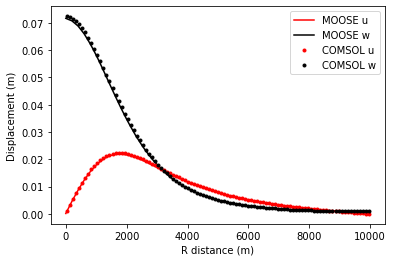

In [72]:
f = plt.figure(1, figsize=(6,4))
plt.plot(moose_disp.x, moose_disp.disp_r, 'r-',
         label="MOOSE u"
        )
plt.plot(moose_disp.x, moose_disp.disp_z, 'k-',
         label="MOOSE w"
        )

plt.plot(comsol_disp[:,0], comsol_disp[:,1], 'r.',
         label="COMSOL u"
        )
plt.plot(comsol_disp[:,0], comsol_disp[:,2], 'k.',
         label="COMSOL w"
        )
plt.legend()

plt.xlabel("R distance (m)")
plt.ylabel("Displacement (m)")

plt.show()
f.savefig('gold/disp_benchmark.pdf')

In [65]:
# load MOOSE results
fname = "step5d_Ellipse_RZ_Gravity_Andy_out_sigma_0001.csv"
moose_sigma = pd.read_csv(fname)
# load COMSOL results
fname = "gold/sigma.txt"
comsol_sigma = np.loadtxt(fname)

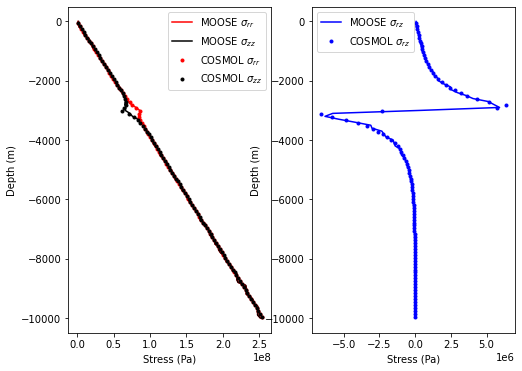

In [73]:
f = plt.figure(1, figsize=(8,6))

plt.subplot(121)
plt.plot(-moose_sigma.stress_xx, moose_sigma.y, 'r-',
         label=r"MOOSE $\sigma_{rr}$"
        )
plt.plot(-moose_sigma.stress_yy, moose_sigma.y, 'k-',
         label=r"MOOSE $\sigma_{zz}$"
        )

plt.plot(-comsol_sigma[:,1], -comsol_sigma[:,0], 'r.',
         label=r"COSMOL $\sigma_{rr}$"
        )
plt.plot(-comsol_sigma[:,2], -comsol_sigma[:,0], 'k.',
         label=r"COSMOL $\sigma_{zz}$"
        )


plt.legend()
plt.xlabel("Stress (Pa)")
plt.ylabel("Depth (m)")

plt.subplot(122)
plt.plot(-moose_sigma.stress_xy, moose_sigma.y, 'b-',
         label=r"MOOSE $\sigma_{rz}$"
        )
plt.plot(-comsol_sigma[:,3], -comsol_sigma[:,0], 'b.',
         label=r"COSMOL $\sigma_{rz}$"
        )
plt.legend()
plt.xlabel("Stress (Pa)")
plt.ylabel("Depth (m)")

plt.show()
f.savefig('gold/stress_benchmark.pdf')


In [43]:
fname = "step5e_Ellipse_RZ_Gravity_pp_out_sigma_face_0001.csv"
df = pd.read_csv(fname)

In [44]:
df_sort = df.sort_values(by=['y','z'])

In [45]:
xi = df_sort.x.values
yi = df_sort.y.values
dat = df_sort.stress_xx.values
dat[dat==-987654321] = np.nan

In [46]:
nx = 501
ny = 501

X = xi.reshape([ny, nx])
Y = yi.reshape([ny, nx])
Z = dat.reshape([ny, nx])

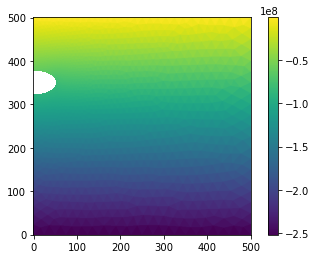

In [47]:
plt.imshow(Z, origin='lower')
plt.colorbar()